In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [87]:
df = pd.read_csv('data.csv')
print(df.shape,df.columns)

(3314, 28) Index(['Unnamed: 0', 'Price Hub', 'Trade Date', 'Delivery Start Date',
       'Delivery End Date', 'High Price $/MWh', 'Low Price $/MWh',
       'Wtd Avg Price $/MWh', 'Change', 'Daily Volume MWh', 'Number of Trades',
       'Number of Companies', 'date_x', 'DNI', 'Temperature', 'DHI',
       'Pressure', 'Relative Humidity', 'Wind Speed', 'date_y', 'Date_x',
       'Date_y', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype='object')


In [88]:
print(df.dtypes)

Unnamed: 0               int64
Price Hub               object
Trade Date              object
Delivery Start Date     object
Delivery End Date       object
High Price $/MWh       float64
Low Price $/MWh        float64
Wtd Avg Price $/MWh    float64
Change                 float64
Daily Volume MWh         int64
Number of Trades         int64
Number of Companies      int64
date_x                  object
DNI                    float64
Temperature            float64
DHI                    float64
Pressure               float64
Relative Humidity      float64
Wind Speed             float64
date_y                  object
Date_x                  object
Date_y                  object
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
dtype: object


In [89]:
df.head()

,Unnamed: 0,Price Hub,Trade Date,Delivery Start Date,Delivery End Date,High Price $/MWh,Low Price $/MWh,Wtd Avg Price $/MWh,Change,Daily Volume MWh,...,Wind Speed,date_y,Date_x,Date_y,Open,High,Low,Close,Adj Close,Volume
0,0,PJM West,2001-01-02,2001-01-03,2001-01-03,65.5,64.5,65.00,NaN,1600,...,908.896006,2001-01-02,2001-01-02,2001-01-02,1320.280029,1320.280029,1276.050049,1283.270020,1283.270020,1.129400e+09
1,1,PJM West,2001-01-03,2001-01-04,2001-01-04,63.0,59.5,61.25,-3.75,3200,...,911.679211,2001-01-03,2001-01-03,2001-01-03,1283.270020,1347.760010,1274.619995,1347.560059,1347.560059,1.880700e+09
2,2,PJM West,2001-01-04,2001-01-05,2001-01-05,60.0,58.5,59.12,-2.13,4800,...,839.573580,2001-01-04,2001-01-04,2001-01-04,1347.560059,1350.239990,1329.140015,1333.339966,1333.339966,2.131000e+09
3,3,PJM West,2001-01-08,2001-01-09,2001-01-09,59.5,59.5,59.50,0.38,800,...,537.587199,2001-01-08,2001-01-08,2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1.115500e+09
4,4,PJM West,2001-01-09,2001-01-10,2001-01-10,58.0,55.5,56.61,-2.89,5600,...,1128.615640,2001-01-09,2001-01-09,2001-01-09,1295.859985,1311.719971,1295.140015,1300.800049,1300.800049,1.191300e+09


In [90]:
df = df.drop(['date_x','date_y','Date_x','Date_y'],axis=1)
X = df.values
print(X.shape)
date_range = pd.date_range(start='1/1/2000',end='1/26/2009')

(3314, 24)


In [91]:
print(date_range)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2009-01-17', '2009-01-18', '2009-01-19', '2009-01-20',
               '2009-01-21', '2009-01-22', '2009-01-23', '2009-01-24',
               '2009-01-25', '2009-01-26'],
              dtype='datetime64[ns]', length=3314, freq='D')


In [92]:
dates = X[:,2]
prices = X[:,7]
print(dates.shape,prices.shape)
date_order = date_range.values
print(date_order.shape)

(3314,) (3314,)
(3314,)


In [93]:
df_prices = pd.DataFrame(prices)
df_date = pd.DataFrame(date_order)

In [94]:
df_arima = pd.DataFrame()
df_arima['prices'] = prices
df_arima= df_arima.set_index(date_order)

In [95]:
df_arima.head()

,prices
2000-01-01,65
2000-01-02,61.25
2000-01-03,59.12
2000-01-04,59.5
2000-01-05,56.61


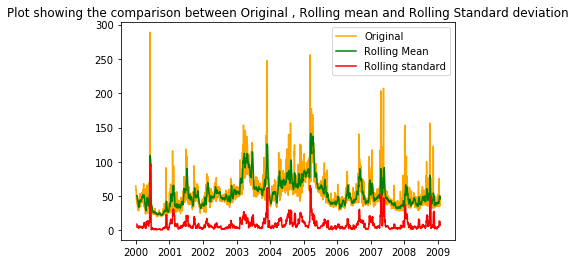

In [96]:
rolling_mean = df_arima.rolling(window = 12).mean()
rolling_standard_deviation = df_arima.rolling(window = 12).std()
plt.plot(df_arima,color='orange',label='Original')
plt.plot(rolling_mean,color='green',label='Rolling Mean ')
plt.plot(rolling_standard_deviation,color='red',label='Rolling standard')
plt.legend(loc = 'best')
plt.title('Plot showing the comparison between Original , Rolling mean and Rolling Standard deviation')
plt.show()

In [97]:
arima_res = adfuller(df_arima['prices'])
print('ADF statistics - {}'.format(arima_res[0]))
print('p-values - {}'.format(arima_res[1]))
print('Critical_values -')
for key , value in arima_res[4].items():
    print('\t{}-{}'.format(key,value))

ADF statistics - -4.071282912870885
p-values - 0.0010799697525542456
Critical_values -
	1%--3.4323422122539857
	5%--2.862420241278329
	10%--2.567238570806373


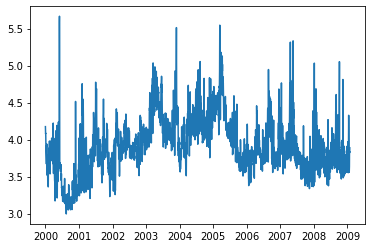

In [98]:
df_arima_log = np.log(df_arima.astype(np.float64))
plt.plot(df_arima_log)

In [99]:
def analysis(data_frame,titles):
    
    mean = data_frame.rolling(window=12).mean()
    standard = data_frame.rolling(window=12).std()
    
    orig = plt.plot(data_frame,color='orange',label='Original')
    mean_ = plt.plot(mean,color='green',label='Mean')
    std = plt.plot(standard,color='red',label='Standard Deviation')
    plt.legend(loc='best')
    plt.title(titles)
    plt.show(block = False)
    
    

In [100]:
def result_stats(data_frame):
    res = adfuller(data_frame['prices'])
    print('ADF Statistic: {}'.format(res[0]))
    print('p-value: {}'.format(res[1]))
    print('Critical Values:')
    for key, value in res[4].items():
        print('\t{}: {}'.format(key, value))

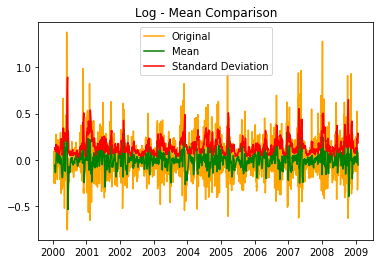

ADF Statistic: -15.141631587025733
p-value: 6.997448627447664e-28
Critical Values:
	1%: -3.4323452515445956
	5%: -2.862421583712013
	10%: -2.5672392854885486


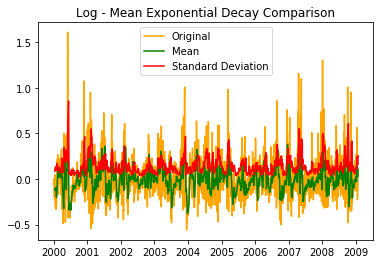

ADF Statistic: -15.188740296877187
p-value: 6.052504804778651e-28
Critical Values:
	1%: -3.432328948643146
	5%: -2.862414382816965
	10%: -2.567235451893058


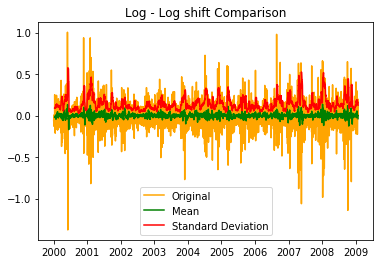

ADF Statistic: -15.872597774481335
p-value: 8.945901992067664e-29
Critical Values:
	1%: -3.4323416055066382
	5%: -2.86241997328205
	10%: -2.5672384281310743


In [101]:
#-----------------------------

arima_roll_mean = df_arima_log.rolling(window=12).mean()
df_arima_log_mean = df_arima_log - arima_roll_mean
df_arima_log_mean.dropna(inplace = True)
analysis(df_arima_log_mean,'Log - Mean Comparison')
result_stats(df_arima_log_mean)

#------------------------------

arima_roll_mean_dec = df_arima_log.ewm(halflife = 12,min_periods = 0, adjust = True).mean()
df_arima_log_decay = df_arima_log - arima_roll_mean_dec
df_arima_log_decay.dropna(inplace = True)
analysis(df_arima_log_decay,'Log - Mean Exponential Decay Comparison')
result_stats(df_arima_log_decay)

#-------------------------------

df_arima_log_shift = df_arima_log - df_arima_log.shift()
df_arima_log_shift.dropna(inplace  = True)
analysis(df_arima_log_shift,'Log - Log shift Comparison')
result_stats(df_arima_log_shift)


## Prediction Model Arima

C:\Users\Akshay Gupta\Anaconda3\envs\cobra\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Akshay Gupta\Anaconda3\envs\cobra\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


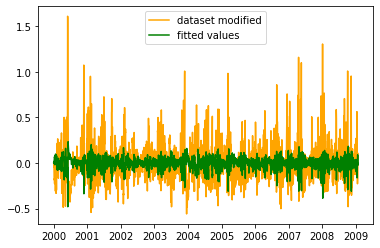

In [102]:
sesonal_decompositional = seasonal_decompose(df_arima_log)
model = ARIMA(df_arima_log,order = (2,1,2))
res = model.fit(disp = -1)
plt.plot(df_arima_log_decay,color = 'orange',label = 'dataset modified')
plt.plot(res.fittedvalues,color = 'green',label = 'fitted values')
plt.legend(loc = 'best')
plt.show()

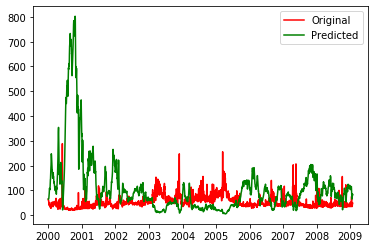

In [103]:
arima_pred_diff = pd.Series(res.fittedvalues,copy = True)
arima_pred_diff_cummulativesum = arima_pred_diff.cumsum()
arima_pred_log = pd.Series(df_arima_log['prices'].iloc[0],index = df_arima_log.index)
arima_pred_log = arima_pred_log.add(arima_pred_diff_cummulativesum,fill_value = 0)
arima_pred = np.exp(arima_pred_log)
plt.plot(df_arima,color = 'red',label='Original')
plt.plot(arima_pred,color = 'green',label='Predicted')
plt.legend(loc='best')
plt.show()

In [105]:
from sklearn.metrics import mean_squared_error
import math
error = mean_squared_error(df_arima.values,arima_pred.values)
print('Root mean squared error for prediction with ARIMA model',math.sqrt(error))

Root mean squared error for prediction with ARIMA model 147.5509182239792
